In [2]:
import math
import random
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

from deap import base, creator, tools, gp, algorithms
import math, operator, random, numpy
import seaborn
import pandas as pd

# Assignment 1

We have the formula
$$
S_m(H) = (1 - p_m)^{o(H)}
$$
For H = A1 we have:
$$
S_m(#1#100###) = (1 - 0.01)^{4} = 0.96059601
$$
For H = A2 we have:
$$
S_m(##010#011) = (1 - 0.01)^{6} = 0.9414801494
$$
A1 has the highest chance of survival because Sm(A1) > Sm(A2)

# Assignment 2

This would be the Needle in a haystack problem.

The fitness function of a EA, when modelling this problem, will for example either have a value of 0 or 1 and nothing in between. This means that there is no way to stepwise improve the fitness that will lead us from 0 to the global optimum of 1.

In other words, with the building block hypothesis we assume that a GA can create stepwise better solutions by mutating, selecting and crossing short good partial solutions(low order, high fitness, short defining lenght) but with this problem there are no partial solutions to combine. 

# Assignment 3

**a)**

In [ ]:
values = [2, 3, 4]
labels = ['x = 2', 'x = 3', 'x = 4']
out = list(map(lambda x: x**2, values)), list(map(lambda x: x**2 + 20, values))
outnorm = [float(i)/sum(out[0]) for i in out[0]], [[float(i)/sum(out[1]) for i in out[1]]]

fig1, ax1 = plt.subplots()
ax1.pie(out[0], labels=labels, autopct='%1.1f%%')
ax1.axis('equal')


print('\tf(x)\tselection probability')
[print(f'x={values[i]}\t{out[0][i]}\t{"{:.0%}".format(outnorm[0][i])}') for i in range(len(values))]
plt.show()

**b)**

The selection pressure is high when some indivuduals have a higher chance of being chosen due to their fitness. 

Here, function $f_1$ yields a lower selection pressure than $f(x)$ because the fitnesses values of the individuals are much closer to each other when using fitness function $f_1$.

Thus, in $f_1$ the chance of being selected for the individuals are more closer to each other compared to the chance of being selected in $f$.

In [ ]:
fig1, ax1 = plt.subplots()
ax1.pie(out[1], labels=labels, autopct='%1.1f%%')
ax1.axis('equal')


print('\tf(x)+20\tselection probability')
[print(f'x={values[i]}\t{out[1][i]}\t{"{:.0%}".format(outnorm[1][0][i])}') for i in range(len(values))]
plt.show()

**c)**


Fitness scaling decreases selection pressure (if the scaling constant is large enough) because it adds the same constant value to the selection probability of each individual making sure one very fit individual does not outcompete all others.  

# Assignment 4.1

In [ ]:
def compute_score(goal, x_m):    
    counter = 0
    print(goal, x_m)
    for i in range(len(goal)):
        if goal[i] == x_m[i]:
            counter += 1
    
    return counter

def binary_GA(goal, x, p_m):   
    digit_x = [int(a) for a in str(x)]
    digit_x_m = [int(a) for a in str(x)]
    while True:
        for index in range(len(digit_x_m)):
            rand = random.uniform(0, 1)
            if rand <= p:
                if digit_x_m[index] == 1:
                    
                    digit_x_m[index] = 0
                else:
                    digit_x_m[index] = 1
        digit_goal = [int(a) for a in str(goal)]
        digit_x = [int(a) for a in str(x)]
        
        
        mutate_score = compute_score(str(goal), (''.join(map(str,digit_x_m))))
        origin_score = compute_score(str(goal), (''.join(map(str,digit_x))))
        
        print(goal,x, digit_x_m, mutate_score, origin_score)
        if mutate_score > origin_score:
            return (''.join(map(str,digit_x_m)))


In [ ]:
goal = '11100010'
x = '01111001'
p = 0.05      

counter = 0
while not (x == goal):
    x = binary_GA(goal, x, p)
    print('iteration {0:2d} complete.\n'.format(counter))
    print(x)
    counter += 1
    


# Assignment 4.2

**a)**

In [ ]:
def genbin(n):
    number = ''
    for i in range(n):
        number += str(random.randint(0, 1))
    
    return number

def counting_ones(l, p, fitness, iterations, x, goal_runs):
    runs_lst = []

    runs = 0
    while runs < goal_runs:
        iteration = 0
        iteration_lst = []
        x = [random.randint(0, 1) for _ in range(l)]
        while len(iteration_lst) < iterations:
            x_m = x.copy()
            for index in range(len(x_m)):
                rand = random.uniform(0, 1)
                if rand <= p:
                    if x_m[index] == 1:
                        x_m[index] = 0
                    else:
                        x_m[index] = 1        

            mutate_score = fitness(x_m)
            origin_score = fitness(x)

            if mutate_score > origin_score:
                x = x_m
            iteration_lst.append(origin_score)
        runs_lst.append(iteration_lst)
        runs += 1
    return runs_lst

def dumb_counting_ones(l, p, fitness, iterations, x, goal_runs):
    runs_lst = []

    runs = 0
    while runs < goal_runs:
        iteration = 0
        best_score = 0
        iteration_lst = []
        x = [random.randint(0, 1) for _ in range(l)]
        while len(iteration_lst) < iterations:
            x_m = x.copy()
            for index in range(len(x_m)):
                rand = random.uniform(0, 1)
                if rand <= p:
                    if x_m[index] == 1:
                        x_m[index] = 0
                    else:
                        x_m[index] = 1        

            mutate_score = fitness(x_m)

            if mutate_score > best_score:
                best_score = mutate_score
            iteration_lst.append(best_score)
        runs_lst.append(iteration_lst)
        runs += 1
        
    return runs_lst

In [ ]:
l = 100
p = 1/l
fitness = lambda x: sum(x)
iterations = 1500
x = [random.randint(0, 1) for _ in range(l)]
goal_runs = 1


runs_lst = counting_ones(l,p,fitness, iterations, x, goal_runs)
    

plt.title('One run with random starting values for x')
for index, run in enumerate(runs_lst):
    plt.plot(run, label = 'Run {0:2d}'.format(index))
plt.ylim([40,101])
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.show()

**b)**

In [ ]:
l = 100
p = 1/l
fitness = lambda x: sum(x)
x = [random.randint(0, 1) for _ in range(l)]
iterations = 1500
goal_runs = 10


runs_lst = counting_ones(l,p,fitness, iterations, x, goal_runs)

plt.title('10 runs with random starting values for x')
for index, run in enumerate(runs_lst):
    plt.plot(run, label = 'Run {0:2d}'.format(index))
plt.ylim([40,101])
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.show()


Plot 10 different runs of 1500 iterations, with each value having a different starting x. Pretty much all of the runs will converge, however rarely one run will be just below the optimal fitness at the 1500th iteration.

**c)**

In [ ]:
l = 100
p = 1/l
fitness = lambda x: sum(x)
x = [random.randint(0, 1) for _ in range(l)]
iterations = 1500
goal_runs = 10


runs_lst = dumb_counting_ones(l,p,fitness, iterations, x, goal_runs)

plt.title('10 runs with random starting values for x')
for index, run in enumerate(runs_lst):
    plt.plot(run, label = 'Run {0:2d}'.format(index))
plt.ylim([40,101])
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.show()


10 runs with 1500 iterations each, where each mutation is saved and used as the basis for the next iteration. This means the best mutation is not saved, therefore the algorithm will probably (very likely) never converge to 100 fitness. The plot depitcts the best achieved scores per run.

# Assignment 5

 **a)**

A 1+1 evolutionary algorithm has each parent generate one offspring. A 1+5 evolutionary algorithm, to our understanding at least, would then have each parent generate 5 offspring. The offspring are then compared to its/their parent and the fittest will proceed. In essence creating a subpool of parent(s) + offspring, from which the individual with the greatest fitness leaves. A larger pool of offspring results in more possible mutations, which might result in more/better mutations over the parent. So 1+5 would probably converge to a local optimum sooner at the cost of a larger computational complexity.


**b)**

We understand 1+λ EA to a mutarionrate self-regulating EA. Where one parent who creates a set of offspring in which one half of the offspring will mutate at double the set mutation rate, and the other half at half the set mutation rate. The best offspring is chosen and the set mutation rate is chosen to be the mutation rate of which this individual originates (either double or half the previous rate). Comparing this (still) stochastical process to the local search we would think that the local search would perform better, since we know that that 1+λ remains a stochastical algorithm, and therefore does not guarrantee immediate optima in the local search, whereas the local search (is assumed) to always make a locally optimal step. Furthermore both algorithms seem to be greedy in nature due to them prioritising direct (within one or a few steps) gains in fitness over long term benefit, which puts them on equal footing. Therefore we maintain that we think the local search would perform better (albeit probably less efficient).

# Assignment 6

**a)**

**b)**

In [ ]:
distance = lambda pos1, pos2: math.sqrt((pos2[0] - pos1[0])**2 + (pos2[1] - pos1[1])**2)


def load_file(name):
    tsp = []
    with open(name) as f:
        lines = f.readlines()
        
    for line in lines:
        tsp_single = []
        coordinates = line.split()
        tsp_single.append(float(coordinates[0]))
        tsp_single.append(float(coordinates[1]))
        tsp.append(tsp_single)

    return tsp

def total_distance(city_coords, cities):
    total_dist = 0
    for i in range(len(cities)-1):
        total_dist += distance(city_coords[cities[i]], city_coords[cities[i+1]])
    return total_dist


def two_opt(route):
    get_slice = lambda x: x if x is not None else []
    best_route = route
    best_distance = total_distance(city_coords, route)
    for i in range(len(route)):
        for k in range(i+2, len(route)+1):
            mid = get_slice(route[i:k])
            mid.reverse()
            new_route = get_slice(route[:i]) + mid + get_slice(route[k:])
            new_distance = total_distance(city_coords, new_route)
            if new_distance < best_distance:
                best_route = new_route
                best_distance = new_distance
    return best_route

def crossover(pool):
    m, d = random.sample(range(len(pool)), 2)
    mom = pool[m]
    dad = pool[d]
    c1 = random.randint(0, len(mom)-1)
    c2 = random.randint(c1+1, len(mom))
    dadw = dad[c2:] + dad[:c2]
    momw = mom[c2:] + mom[:c2]
    rest_one = [x for x in dadw if x not in mom[c1:c2]]
    rest_two = [x for x in momw if x not in dad[c1:c2]]
    child_one = rest_one[len(mom)-c2:] + mom[c1:c2] + rest_one[:len(mom)-c2]
    child_two = rest_two[len(mom)-c2:] + dad[c1:c2] + rest_two[:len(mom)-c2]
    return child_one, child_two

def mutate(list, mutate_chance):
    if random.uniform(0, 1) > mutate_chance:
        return list
    i, j = np.random.choice(range(len(list)), 2, replace = False) 
    list[i], list[j] = list[j], list[i]
    return list
    
def create_next_generation(pool, prop_fitnesses, num_start_instances, mutate_chance, use_local, num_elites):
    parents = random.choices(pool, prop_fitnesses, k=num_start_instances)
    elites = [pool[x] for x in np.argpartition(prop_fitnesses, num_elites)[:num_elites]]
    new_generation = elites
    loop_max = int(np.ceil(len(parents)/2))
    for i in range(loop_max-num_elites):
        o1, o2 = crossover(parents)
        o1 = mutate(o1, mutate_chance)
        o2 = mutate(o2, mutate_chance)
        if use_local:
            o1 = two_opt(o1)
            o2 = two_opt(o2)
        new_generation.append(o1)
        new_generation.append(o2)
        
    return new_generation

def show_map(route):
    for i in range(len(route)-1):
        path_x = [city_coords[route[i]][0], city_coords[route[i+1]][0]]
        path_y = [city_coords[route[i]][1], city_coords[route[i+1]][1]]
        plt.plot(path_x, path_y, 'ro-')
    plt.show()

def mem_tsp(num_iterations, num_start_instances, mutate_chance, num_elites):
    avg_fitnesses = []
    best_fitnesses = []
    use_local = True
    pool = [np.random.permutation(len(city_coords)).tolist() for x in range(num_start_instances)]
    pool = [two_opt(r) for r in pool]
    fitnesses = [total_distance(city_coords, r) for r in pool]
    prop_fitnesses = [f/sum(fitnesses) for f in fitnesses]
    print('Memetic')
    for it in range(num_iterations):
        pool = create_next_generation(pool, prop_fitnesses, num_start_instances, mutate_chance, use_local, num_elites)
        fitnesses = [total_distance(city_coords, r) for r in pool]
        prop_fitnesses = [f/sum(fitnesses) for f in fitnesses]
        avg_fitnesses.append(sum(fitnesses)/len(fitnesses))
        best_fitnesses.append(min(fitnesses))
        print(it)
    return avg_fitnesses, best_fitnesses

def ea_tsp(num_iterations, num_start_instances, mutate_chance, num_elites):
    avg_fitnesses = []
    best_fitnesses = []
    use_local = False
    pool = [np.random.permutation(len(city_coords)).tolist() for x in range(num_start_instances)]
    fitnesses = [total_distance(city_coords, r) for r in pool]
    prop_fitnesses = [f/sum(fitnesses) for f in fitnesses]
    print('EA')
    for it in range(num_iterations):
        pool = create_next_generation(pool, prop_fitnesses, num_start_instances, mutate_chance, use_local, num_elites)
        fitnesses = [total_distance(city_coords, r) for r in pool]
        prop_fitnesses = [f/sum(fitnesses) for f in fitnesses]
        avg_fitnesses.append(sum(fitnesses)/len(fitnesses))
        best_fitnesses.append(min(fitnesses))
        print(it)
    return avg_fitnesses, best_fitnesses
        

city_coords = load_file('file-tsp.txt')

iterations = 1500
instances = 26
elites = 10
avg_mem, best_mem = mem_tsp(iterations, instances, 0.05, elites)
avg_ea, best_ea = ea_tsp(iterations, instances, 0.1, elites)

**c)**

In [ ]:
plt.plot(range(iterations), avg_mem, label = 'average fitness')
plt.plot(range(iterations), best_mem, label = 'best fitness')
plt.title('memetic algorith convergence plot')
plt.ylim([100,500])
plt.legend()
plt.ylabel('fitness')
plt.xlabel('iterations')
plt.show()

plt.plot(range(iterations), avg_ea, label = 'average fitness')
plt.plot(range(iterations), best_ea, label = 'best fitness')
plt.title('Evolutionary algorithm convergence plot')
plt.ylim([100,500])
plt.legend()
plt.ylabel('fitness')
plt.xlabel('iterations')
plt.show()

**d)**


The memetic algorithm works a lot better


**e)**

It is not fair, because the memetic algorithm uses local search which is an additional method to improve the pool. The regular evolution algorithm doesn't have this and merely relies on the number of iterations. I think it would be more fair if we increased the number of iterations for the evolution algorithm. The evolution algorithm would otherwise be exactly the same as the memetic approach minus the local search function, and the local search function only improves the instances and never makes them worse.


**f)** In https://arxiv.org/ftp/arxiv/papers/1004/1004.0574.pdf it is found that memetic algorithms work better than genetic algorithms, it was tested on many NP-hard problems.

# Assignment 7

**a)**


T1 = {y, True, x, z}


F1 = {f(&rightarrow;, x1, x2), f(&wedge;, x1, x2), f(&vee;, x1, x2), f(&leftrightarrow;, x1, x2)}

In [ ]:
plt.imshow(mpimg.imread('im1.jpeg'))
plt.show()

**b)**

T2 = {0.23, Z, X, 0.789}


F2 = {f(*, x1, x2), f(+, x1, x2), f(-, x1, x2)}

In [ ]:
plt.imshow(mpimg.imread('im2.jpeg'))
plt.show()

# Assignment 8

In [3]:
# all initialisation code: 
# IMPORTANT this code can only be run once (so empty kernel if you need to run it again), this is a limitation of the chosen framework
data = [
  (-1.0, 0.0000),
  (-0.9, -0.1629),
  (-0.8, -0.2624),
  (-0.7, -0.3129),
  (-0.6, -0.3264),
  (-0.5, -0.3125),
  (-0.4, -0.2784),
  (-0.3, -0.2289),
  (-0.2, -0.1664),
  (-0.1, -0.0909),
  (0, 0.0),
  (0.1, 0.1111),
  (0.2, 0.2496),
  (0.3, 0.4251),
  (0.4, 0.6496),
  (0.5, 0.9375),
  (0.6, 1.3056),
  (0.7, 1.7731),
  (0.8, 2.3616),
  (0.9, 3.0951),
  (1.0, 4.0000)
]
# creating function set f
def protectedDiv(left, right):
    try:
        return left / right
    except ZeroDivisionError:
        return 1
def protectedLog(left, right):
    try: 
        left = abs(left)
        right = abs(right)
        return math.log(left,right)
    except ValueError:
        return 0
    except ZeroDivisionError:
        return 0
    
primitives = gp.PrimitiveSet("MathematicalOperators", 1)
primitives.addPrimitive(operator.add, 2)
primitives.addPrimitive(operator.sub, 2)
primitives.addPrimitive(operator.mul, 2)
primitives.addPrimitive(protectedDiv, 2)
primitives.addPrimitive(protectedLog, 2)
primitives.addPrimitive(math.exp, 1)
primitives.addPrimitive(math.cos, 1)
primitives.addPrimitive(math.sin, 1)
primitives.addEphemeralConstant("x", lambda: random.uniform(-1.000000000,1.000000000))

# create fitness and individual, which are building blocls for deap library
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMax)

INITIAL_POPULATION_SIZE = 1000

#creating initialisation
toolbox = base.Toolbox()
toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=primitives, min_=1, max_=2)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=primitives)

# self made fitnessfunction for -sum of absolute value
def fitnessfunc(individual):
    func = toolbox.compile(expr=individual)
    sum = 0
    for x in data:
        sum += abs(func(x[0]) - x[1])
    return (-1*sum,)

# self made func to calculate number of nodes of best individual during iteration
def best_func(ind):
    poplist =[]
    for x in pop:
        poplist.append(x.fitness.values)
    bestfit = max(poplist)
    if ind.fitness.values == bestfit:
        return len(ind)
    else: return 0

# instantiate evaluation, selection, mate and mutate , also set max_value =17 as standart to avoid bloat (from book Kozak)
toolbox.register("evaluate", fitnessfunc)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=primitives)
toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))
toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))

# Stats for logbook
stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
stats_size = tools.Statistics(len)
stat_f = tools.Statistics(best_func)
mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size, bestf= stat_f)
mstats.register("avg", numpy.mean)
#mstats.register("std", numpy.std)
#mstats.register("min", numpy.min)
mstats.register("max", numpy.max)

In [4]:
# running model 

# running model with 50 generations, cross prob = 0.7 , mutation prob = 0 
pop = toolbox.population(n=INITIAL_POPULATION_SIZE)
hof = tools.HallOfFame(1)
pop, log = algorithms.eaSimple(pop, toolbox, 0.7, 0, 50, stats=mstats, halloffame=hof, verbose=True)

# creating dataframe for plot from logbook
gen = log.select("gen")
fit_max = log.chapters["fitness"].select("max")
size_avg = log.chapters["size"].select("avg")
best_f = log.chapters["bestf"].select("max")

df = pd.DataFrame(list(zip(gen,fit_max,size_avg, best_f)), columns=['gen','max_fitness','avg_nodes', 'nodes best individual'])
df

   	      	            bestf             	               fitness                	             size             
   	      	------------------------------	--------------------------------------	------------------------------
gen	nevals	avg 	gen	max	nevals	avg     	gen	max    	nevals	avg 	gen	max	nevals
0  	1000  	0.01	0  	5  	1000  	-124.243	0  	-5.2503	1000  	3.86	0  	7  	1000  
1  	692   	0.008	1  	4  	692   	-18.568 	1  	-4.24698	692   	3.685	1  	9  	692   
2  	692   	0.048	2  	4  	692   	-15.7576	2  	-4.24698	692   	3.688	2  	11 	692   
3  	714   	0.104	3  	4  	714   	-14.2652	3  	-4.24698	714   	3.682	3  	9  	714   
4  	710   	0.007	4  	7  	710   	-15.6114	4  	-3.40968	710   	3.781	4  	10 	710   
5  	750   	0.014	5  	7  	750   	-13.274 	5  	-3.40968	750   	4.245	5  	10 	750   
6  	676   	0.006	6  	6  	676   	-11.6937	6  	-3.38895	676   	4.629	6  	11 	676   
7  	676   	0.006	7  	6  	676   	-10.837 	7  	-3.32951	676   	4.883	7  	11 	676   
8  	692   	0.008	8  	8  	692   	-11.0742	8  

,gen,max_fitness,avg_nodes,nodes best individual
0,0,-5.250298,3.860,5
1,1,-4.246982,3.685,4
2,2,-4.246982,3.688,4
3,3,-4.246982,3.682,4
4,4,-3.409683,3.781,7
5,5,-3.409683,4.245,7
6,6,-3.388954,4.629,6
7,7,-3.329512,4.883,6
8,8,-1.496428,5.008,8
9,9,-1.496428,5.022,8


# 8.a

<AxesSubplot:xlabel='gen', ylabel='max_fitness'>

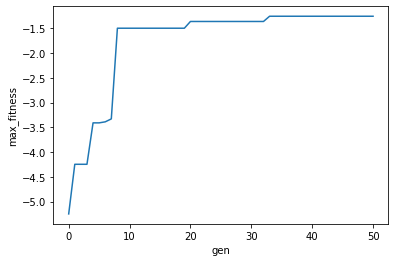

In [5]:
# question a
seaborn.lineplot(data=df,x='gen',y='max_fitness')

# 8.b

<AxesSubplot:xlabel='gen', ylabel='avg_nodes'>

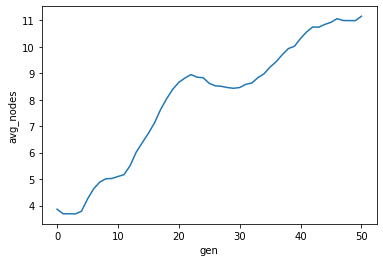

In [6]:
# question b (BONUS plot with averagenodes best individual nodes)
# gebruik ipv y= avg_nodes de size van de beste individual (gebruik HallOffame) ,
seaborn.lineplot(data=df,x='gen',y='avg_nodes')

<AxesSubplot:xlabel='gen', ylabel='nodes best individual'>

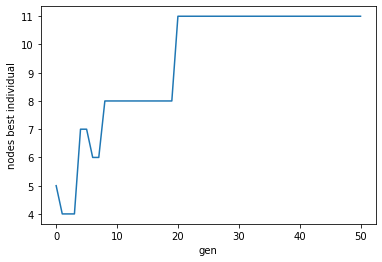

In [7]:
# question b 
# gebruik ipv y= avg_nodes de size van de beste individual (gebruik HallOffame) ,
seaborn.lineplot(data=df,x='gen',y='nodes best individual')

b) 
In the plot of graph 8a and what we would expect in the graph of 8b we see observe that running the model somethimes converges quicker than other times with visable plateaus in the search space. We also see a steady increase in the avg number of nodes in graph 8b (and expect to see this in 8b if we plotted the number nodes of the best individual per iteration). The problem this will cause is bloat. That the search algorithm is baised towards bigger trees. Note that now 8b is also plotted and we see that indeed the size of the trees increases over time, also for the best individual. 

We can try to overcome this issue by adjusting the max lenght of a tree, pruning or giving a penality for big trees. Or reducing the size of the trees by applying simplification[1], creating several childsubtrees from the parent tree. This ofcourse causes the childtrees to be less bloated than the parent tree as they are per defenition smaller.  


[1] Javed, Noman, and Fernand Gobet. "On-the-fly simplification of genetic programming 
models." Proceedings of the 36th Annual ACM Symposium on Applied Computing. 2021.
